# 07wk-2: Numpy 활용 (2)

최규빈  
2023-04-19

<a href="https://colab.research.google.com/github/guebin/PP2023/blob/main/posts/02_DataScience/2023-04-19-7wk-2.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" style="text-align: left"></a>

# 강의영상

> youtube:
> <https://youtube.com/playlist?list=PLQqh36zP38-xYcEpzHG1vC5hYDpgE5V5Z>

# imports

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 예비학습: matplotlib

## 범례추가

`-` 예시1

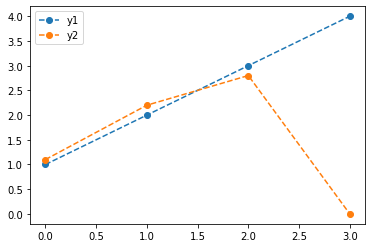

In [122]:
y1= [1.0, 2.0, 3.0, 4.0]
y2= [1.1, 2.2, 2.8, 0.0]
plt.plot(y1,'--o',label='y1')
plt.plot(y2,'--o',label='y2')
plt.legend()

`-` 예시2

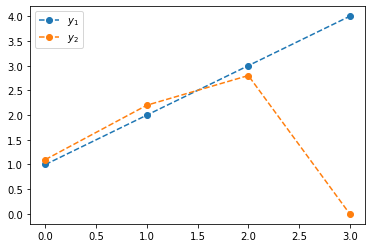

In [123]:
y1= [1.0, 2.0, 3.0, 4.0]
y2= [1.1, 2.2, 2.8, 0.0]
plt.plot(y1,'--o',label=r'$y_1$')
plt.plot(y2,'--o',label=r'$y_2$')
plt.legend()

# 넘파이 활용 (2단계)

## 변환을 의미하는 행렬

`1-3`. 아래는 우산모양의 scatter plot을 그릴 수 있는 $(x_i,y_i)$
좌표값을 불러와서 시각화하는 코드이다.

In [67]:
# 자료저장 
data_raw = np.array(pd.read_csv('https://raw.githubusercontent.com/guebin/2021IR/master/_notebooks/round2.csv')).T
data_raw

In [68]:
# 저장된 자료를 x,y로 분해 
x_raw,y_raw = data_raw
x_raw,y_raw

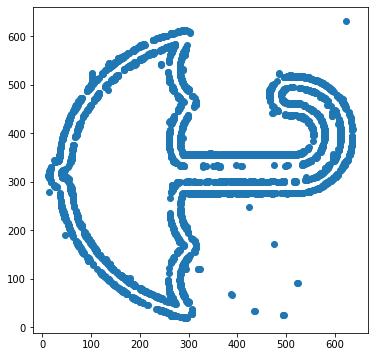

In [69]:
# 시각화
plt.figure(figsize=(6,6)) # 그림크기고정
plt.plot(x_raw,y_raw,'o')

`1`. `x_raw`와 `y_raw`를 각각 표준화하고 `x`, `y`에 저장하라. 결과를
시각화하라. 그리고 `x`, `y`를 바탕으로 `data` matrix를 다시 구성하라.

`(풀이)`

**표준화**

In [70]:
x= (x_raw-np.mean(x_raw)) / np.std(x_raw,ddof=1)
y= (y_raw-np.mean(y_raw)) / np.std(y_raw,ddof=1)

**시각화**

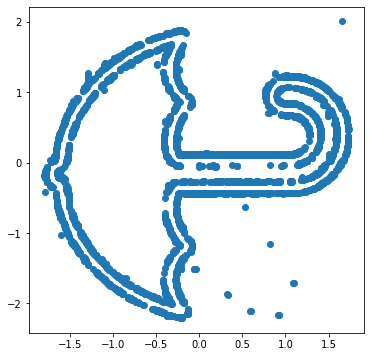

In [71]:
plt.figure(figsize=(6,6)) # 그림크기고정
plt.plot(x,y,'o')

**data matrix** 재구성

In [72]:
data = np.array([x,y])
data

`2`. 아래와 같은 규칙에 따라 $(x_i,y_i)$를 $(\tilde{x}_i,\tilde{y}_i$)로
변환하라. 단 여기에서 $\theta= \frac{\pi}{4}$로 가정한다.

-   ${\tt xx}_i = \tilde{x}_i = (\cos\theta) x_i - (\sin\theta) y_i$
-   ${\tt yy}_i = \tilde{y}_i = (\sin\theta) x_i + (\cos\theta) y_i$

$(x_i,y_i)$와 $(\tilde{x}_i, \tilde{y}_i)$를 겹쳐서 시각화 하라. 이
변환이 의미하는 바는 무엇이라고 생각하는가?

`(풀이1)`

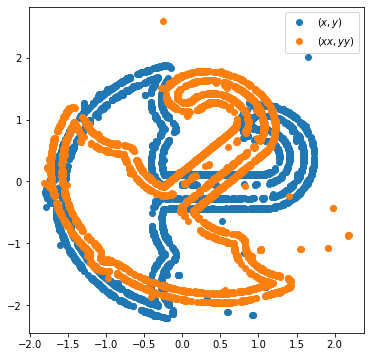

In [73]:
theta = np.pi/4 
xx = np.cos(theta)*x - np.sin(theta)*y
yy = np.sin(theta)*x + np.cos(theta)*y
plt.figure(figsize=(6,6))
plt.plot(x,y,'o', label=r'$(x,y)$') 
plt.plot(xx,yy,'o', label=r'$(xx,yy)$')
plt.legend()

`(풀이2)`

아래의 규칙을 다시 고려하자.

-   ${\tt xx}_i = \tilde{x}_i = (\cos\theta) x_i - (\sin\theta) y_i$
-   ${\tt yy}_i = \tilde{y}_i = (\sin\theta) x_i + (\cos\theta) y_i$

이는 아래와 같이 재표현가능하다.

-   $\begin{cases} {\tt xx}_1 = (\cos\theta)x_1 - (\sin\theta)y_1 \\ {\tt yy}_1 = (\sin\theta)x_1 + (\cos\theta)y_1 \end{cases}$

-   $\begin{cases} {\tt xx}_2 = (\cos\theta)x_2 - (\sin\theta)y_2 \\ {\tt yy}_2 = (\sin\theta)x_2 + (\cos\theta)y_2 \end{cases}$

-   $\dots$

-   $\begin{cases} {\tt xx}_n = (\cos\theta)x_n - (\sin\theta)y_1 \\ {\tt yy}_n = (\sin\theta)x_n + (\cos\theta)y_n \end{cases}$

이는 다시 아래와 같이 재 표현가능하다.

-   $\begin{bmatrix} {\tt xx}_1 \\ {\tt yy}_1 \end{bmatrix} = \begin{bmatrix} \cos\theta & - \sin\theta \\ \sin\theta & \cos\theta \end{bmatrix} \begin{bmatrix} x_1 \\ y_1 \end{bmatrix}$

-   $\begin{bmatrix} {\tt xx}_2 \\ {\tt yy}_2 \end{bmatrix} = \begin{bmatrix} \cos\theta & - \sin\theta \\ \sin\theta & \cos\theta \end{bmatrix} \begin{bmatrix} x_2 \\ y_2 \end{bmatrix}$

-   $\dots$

-   $\begin{bmatrix} {\tt xx}_n \\ {\tt yy}_n \end{bmatrix} = \begin{bmatrix} \cos\theta & - \sin\theta \\ \sin\theta & \cos\theta \end{bmatrix} \begin{bmatrix} x_n \\ y_n \end{bmatrix}$

이는 다시 아래와 같이 재 표현가능하다. (이게 처음엔 생각하기 어려워요!!
$\star\star\star$)

-   $\begin{bmatrix} {\tt xx}_1 & {\tt xx}_2 & \dots & {\tt xx}_n \\ {\tt yy}_1 & {\tt yy}_2 & \dots & {\tt yy}_n \end{bmatrix} = \begin{bmatrix} \cos\theta & - \sin\theta \\ \sin\theta & \cos\theta \end{bmatrix} \begin{bmatrix} x_1 & x_2 & \dots & x_n \\ y_1 & y_2 & \dots & y_n \end{bmatrix}$

위의 수식에 맞추어 변환을 진행하면

In [36]:
theta = np.pi/4 
R = np.array([[np.cos(theta), -np.sin(theta)],[np.sin(theta),np.cos(theta)]])
R 

In [37]:
R @ data

In [38]:
xx,yy = R @ data 

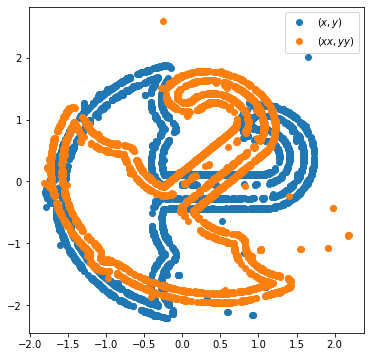

In [39]:
plt.figure(figsize=(6,6))
plt.plot(x,y,'o', label=r'$(x,y)$') 
plt.plot(xx,yy,'o', label=r'$(xx,yy)$')
plt.legend()

`3`. 2번과 같은 변환을 8번 연속진행한 결과를 시각화하라.

`(풀이)`

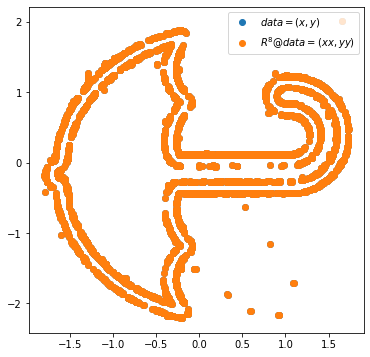

In [42]:
plt.figure(figsize=(6,6))
xx,yy=np.linalg.matrix_power(R,8) @ data
plt.plot(x,y,'o',label=r'$data=(x,y)$') 
plt.plot(xx,yy,'o',label=r'$R^8@data=(xx,yy)$')
plt.legend()

`4`. 2번의 변환을 역변환하는 코드를 구현하라. 원본, 변환, 역변환한
자료를 순서대로 시각화 하라. 결과를 아래와 같이 저장하라.

-   원본: ${\tt x}, {\tt y}$
-   2번변환: ${\tt xx}, {\tt yy}$
-   2번의역변환 ${\tt xxx}, {\tt yyy}$

`(풀이)`

In [43]:
xx,yy = R@data 
xxx,yyy = np.linalg.inv(R)@data

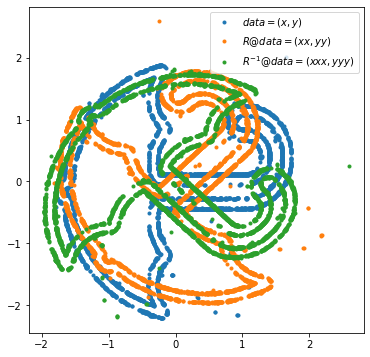

In [44]:
plt.figure(figsize=(6,6))
plt.plot(x,y,'.', label=r'$data = (x,y)$') 
plt.plot(xx,yy,'.', label=r'$R@data = (xx,yy)$')
plt.plot(xxx,yyy,'.', label=r'$R^{-1}@data = (xxx,yyy)$')
plt.legend()

`5-8`. 시계열 자료와 이동평균

`5`. 아래의 수식에 따르는 수열 $x_t$를 생성하라. 단, $T=1000$ 으로
설정하고 랜덤시드는 `np.random.seed(2)`와 같이 설정한다.

-   $x_1=\epsilon_1$
-   $x_2=\epsilon_1+\epsilon_2$
-   $x_3=\epsilon_1+\epsilon_2+\epsilon_3$
-   $\dots$
-   $x_T=\sum_{t=1}^{T} \epsilon_t$

생성결과를 시각화하라.

**hint** 아래의 코드를 활용하면 쉽다.

In [4]:
np.cumsum([1,2,3,4])

`(풀이)`

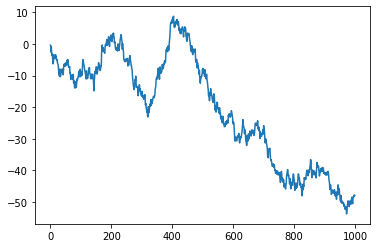

In [7]:
T = 1000
np.random.seed(2)
epsilon = np.random.randn(1000)
x = epsilon.cumsum()
plt.plot(x)

`6`. 아래와 같은 변환을 수행하고 결과를 시각화 하라.

-   ${\tt xx}_1= \frac{1}{3}(x_1+x_2)$
-   ${\tt xx}_2= \frac{1}{3}(x_1+x_2+x_3)$
-   ${\tt xx}_3= \frac{1}{3}(x_2+x_3+x_4)$
-   $\dots$
-   ${\tt xx}_{T-1}= \frac{1}{3}(x_{T-1}+x_{T-1}+x_T)$
-   ${\tt xx}_{T}= \frac{1}{3}(x_{T-1}+x_T)$

**hint** 아래의 수식을 이용하라.

-   $\begin{bmatrix} {\tt xx}_1 \\ {\tt xx}_2 \\ {\tt xx}_3 \\ \dots \\ {\tt xx}_{T-1} \\ {\tt xx}_T \end{bmatrix}= \begin{bmatrix} 1/3 & 1/3 & 0 & 0 & 0 & \dots & 0 & 0 & 0 & 0 \\ 1/3 & 1/3 & 1/3 & 0 & 0 & \dots & 0 & 0 & 0 & 0 \\ 0 & 1/3 & 1/3 & 1/3 & 0 & \dots & 0 & 0 & 0 & 0 \\ \dots & \dots & \dots & \dots & \dots & \dots & \dots & \dots & \dots & \dots \\ 0 & 0 & 0 & 0 & 0 & \dots & 0 & 1/3 & 1/3 & 1/3 \\ 0 & 0 & 0 & 0 & 0 & \dots & 0 & 0 & 1/3 & 1/3 \\ \end{bmatrix}\begin{bmatrix} x_1 \\ x_2 \\ x_3 \\ \dots \\ x_{T-1} \\ x_T \end{bmatrix}$

`(풀이)`

In [8]:
M = np.array([[abs(i-j)<2 for i in range(T)] for j in range(T)])*1/3
M

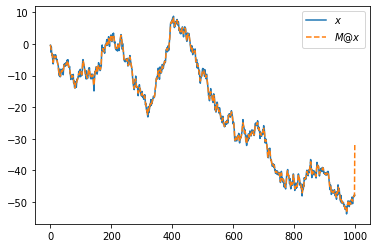

In [9]:
plt.plot(x,label=r'$x$')
plt.plot(M@x,'--',label=r'$M@x$')
plt.legend()

-   끝이 올라간 이유? 마지막에 $\frac{1}{3}(x_{T-1}+x_T+x_{T+1})$ 대신에
    $\frac{1}{3}(x_{T-1}+x_T+0)$ 을 이용하였기 때문

`7`. 아래와 같은 변환을 수행하고 결과를 시각화하라.

-   ${\tt xx}_1= \frac{1}{3}(x_1+x_1+x_2)$
-   ${\tt xx}_2= \frac{1}{3}(x_1+x_2+x_3)$
-   ${\tt xx}_3= \frac{1}{3}(x_2+x_3+x_4)$
-   $\dots$
-   ${\tt xx}_{T-1}= \frac{1}{3}(x_{T-1}+x_{T-1}+x_T)$
-   ${\tt xx}_{T}= \frac{1}{3}(x_{T-1}+x_T+x_T)$

`(풀이)`

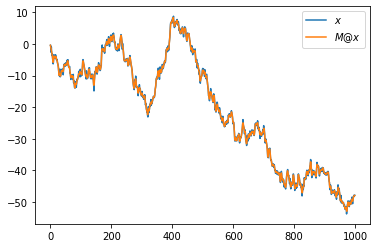

In [10]:
M[0,0] = 2/3 
M[-1,-1] = 2/3 
plt.plot(x,label=r'$x$')
plt.plot(M@x,label=r'$M@x$')
plt.legend()

`8`. 7번의 변환을 100번 반복하고 시각화하라.

`(풀이)`

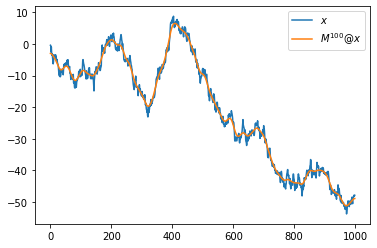

In [11]:
plt.plot(x,label=r'$x$')
plt.plot(np.linalg.matrix_power(M,100)@x,label=r'$M^{100}@x$')
plt.legend()

`9`. 7번의 변환을 1000번 반복하고 시각화하라.

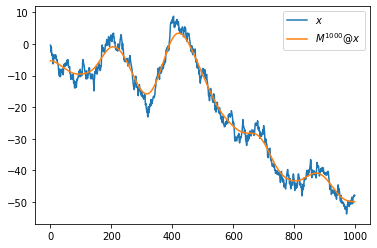

In [12]:
plt.plot(x,label=r'$x$')
plt.plot(np.linalg.matrix_power(M,1000)@x,label=r'$M^{1000}@x$')
plt.legend()

# HW

없음